# First Portfolio Project - EDA with Bestseller Fiction/Non-fiction Books Dataset
### Marya Bamakhramah - Jan 2022
This notebook includes a simple EDA for the dataset of the 50 bestseller books in amazon from 2009 to 2019. The dataset contains a total of 550 books and the information such as rating and number of reviews are obtained from Goodreads website. The main aim of this project is to get used to work with git, python, and reporting in general. This notebook includes:
- Importing Packages
- Loading Data frame
- Checking and Cleaning the Data frame
- Exploring the Data frame
- Visualization
- Conclusion
- Resources


## 1- Importing Packages

In [2]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import textwrap

## 2 - Loading Data frame

In [3]:
books_df = pd.read_csv('Data/bestsellers with categories.csv')
books_df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


#### Dectionary
- Names: the name of the book
- Author: the writer of the book
- User Rating: the rating of the book from Goodreads, out of 5
- Reviews: the number of the total reviews in Goodreads
- Price: the price of the book in dollars ($)
- Year: the year which the book was among the top 50 best sellers in Amazon
- Genre: the genre of the book, it can be a fiction or non-fiction book


## 3 - Checking and Cleaning the Dataframe

In [4]:
# info abput the data
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
#shape
books_df.shape

(550, 7)

In [6]:
#is there any null values that needs handling?
books_df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [7]:
#any duplicated rows?
books_df.duplicated().sum()

0

In [8]:
#any books that were in the 50 best sellers for multiple years?
books_df['Name'].duplicated().sum()

199

In [9]:
#what are the most appeared books and for how many years? 
books_df['dup book']=books_df['Name'].duplicated()
books_df.groupby('Name')['dup book'].count().sort_values(ascending = False).head(10)


Name
Publication Manual of the American Psychological Association, 6th Edition            10
StrengthsFinder 2.0                                                                   9
Oh, the Places You'll Go!                                                             8
The Very Hungry Caterpillar                                                           7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change          7
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)     6
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)             6
The Official SAT Study Guide                                                          5
To Kill a Mockingbird                                                                 5
The 5 Love Languages: The Secret to Love That Lasts                                   5
Name: dup book, dtype: int64

In [10]:
#general calculations about the data
books_df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [11]:
#the dataset supposed to have 50 top seller books for each year from 2009 to 2019, is this actually true?
books_df.groupby('Year').agg({"Name": "count"})

,Name
Year,
2009,50
2010,50
2011,50
2012,50
2013,50
2014,50
2015,50
2016,50
2017,50


The data is clean and ready to be explored!

## 4 - Exploring the Dataframe

In [12]:
#what are the most popular books in the data
most_pop=books_df.sort_values("Reviews", ascending = False).drop_duplicates("Name").head(10)
most_pop

,Name,Author,User Rating,Reviews,Price,Year,Genre,dup book
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction,False
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction,False
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction,False
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction,True
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction,True
437,The Nightingale: A Novel,Kristin Hannah,4.8,49288,11,2015,Fiction,False
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction,False
433,The Martian,Andy Weir,4.7,39459,9,2015,Fiction,False
20,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2014,Fiction,False
338,The Alchemist,Paulo Coelho,4.7,35799,39,2014,Fiction,False


In [13]:
#what are the highest rated books?
most_rated= books_df.sort_values("User Rating", ascending = False).drop_duplicates("Name").head(30)
most_rated

,Name,Author,User Rating,Reviews,Price,Year,Genre,dup book
431,The Magnolia Story,Chip Gaines,4.9,7861,5,2016,Non Fiction,False
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction,False
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction,False
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction,True
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction,False
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction,False
252,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2019,Fiction,True
476,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2013,Fiction,False
486,The Wonderful Things You Will Be,Emily Winfield Martin,4.9,8842,10,2016,Fiction,False
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,2019,Fiction,False


In [14]:
# what is the most popular genre?
books_df['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [15]:
#what is the average price of the best sellers books for each year?
books_df.groupby('Year')['Price'].mean()

Year
2009    15.40
2010    13.48
2011    15.10
2012    15.30
2013    14.60
2014    14.64
2015    10.42
2016    13.18
2017    11.38
2018    10.52
2019    10.08
Name: Price, dtype: float64

In [16]:
#who are the best authors?
books_df['Author'].value_counts().sort_values(ascending= False).head(10)

Jeff Kinney                           12
Rick Riordan                          11
Suzanne Collins                       11
Gary Chapman                          11
American Psychological Association    10
Dr. Seuss                              9
Gallup                                 9
Rob Elliott                            8
Dav Pilkey                             7
Eric Carle                             7
Name: Author, dtype: int64

### 5- Visualization 

In [17]:
#stting graphs
sns.set(font_scale=1.4)
plt.style.use('ggplot')
rcParams['figure.figsize'] = 18, 12

#### Plotting the most popular books (with most reviews):

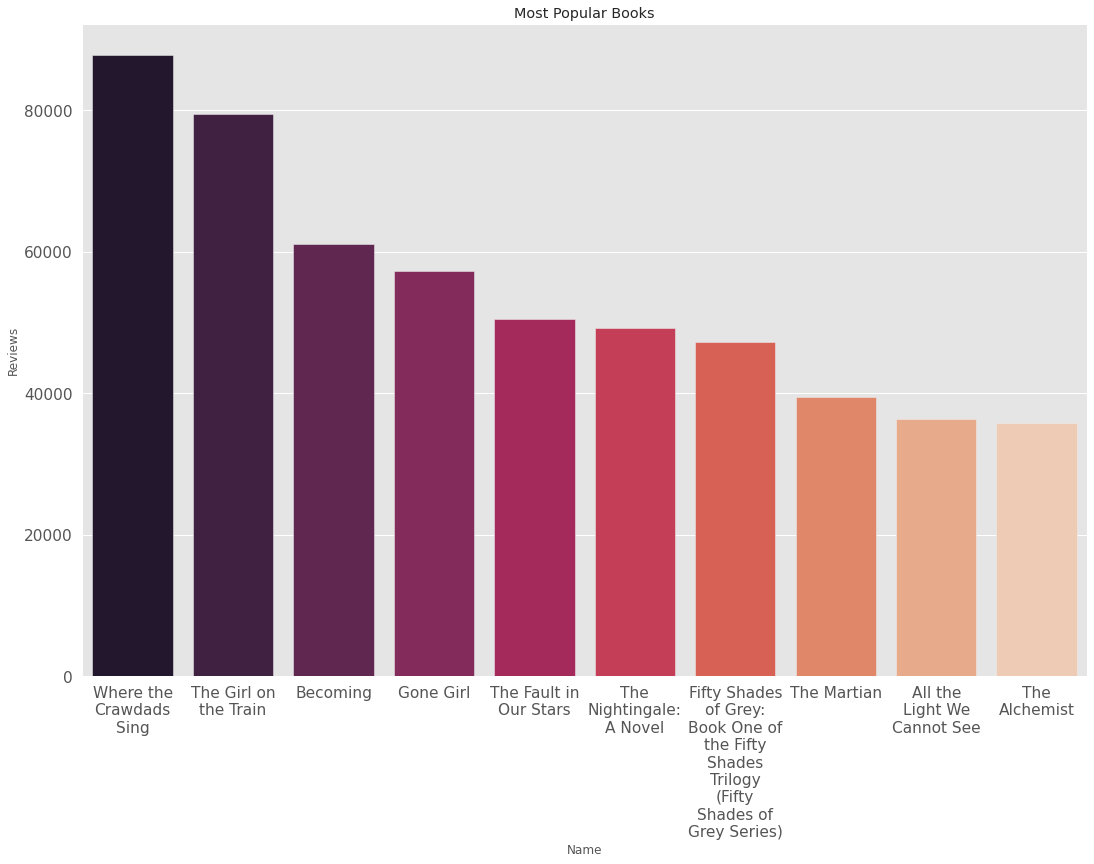

In [18]:

# plotting using seaborn barplot 
ax = sns.barplot(x=most_pop['Name'], y=most_pop['Reviews'], palette="rocket")
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.set_title("Most Popular Books");


#### Comparing the two generes:

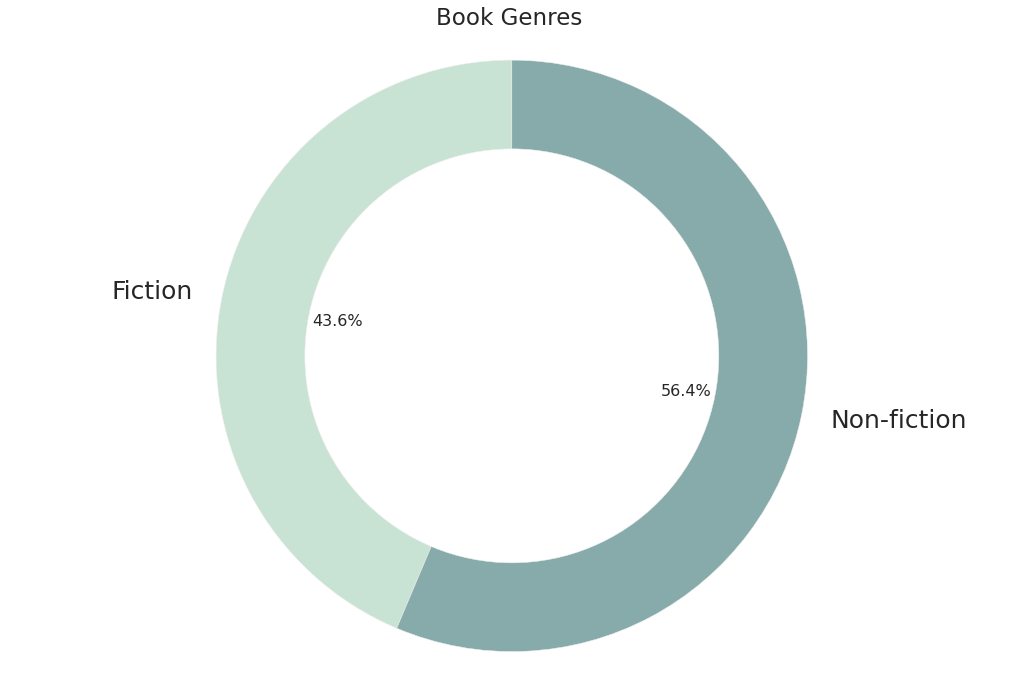

In [22]:
#trying a donut-like pie chart using matplotlib
# Pie chart
labels = ['Fiction', 'Non-fiction']
sizes = [240,310]

#colors
colors = ['#C8E3D4','#87AAAA']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90) 

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title("Book Genres")
plt.rc('font', size=16)
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('figure', titlesize=25)  # fontsize of the figure title
plt.show()

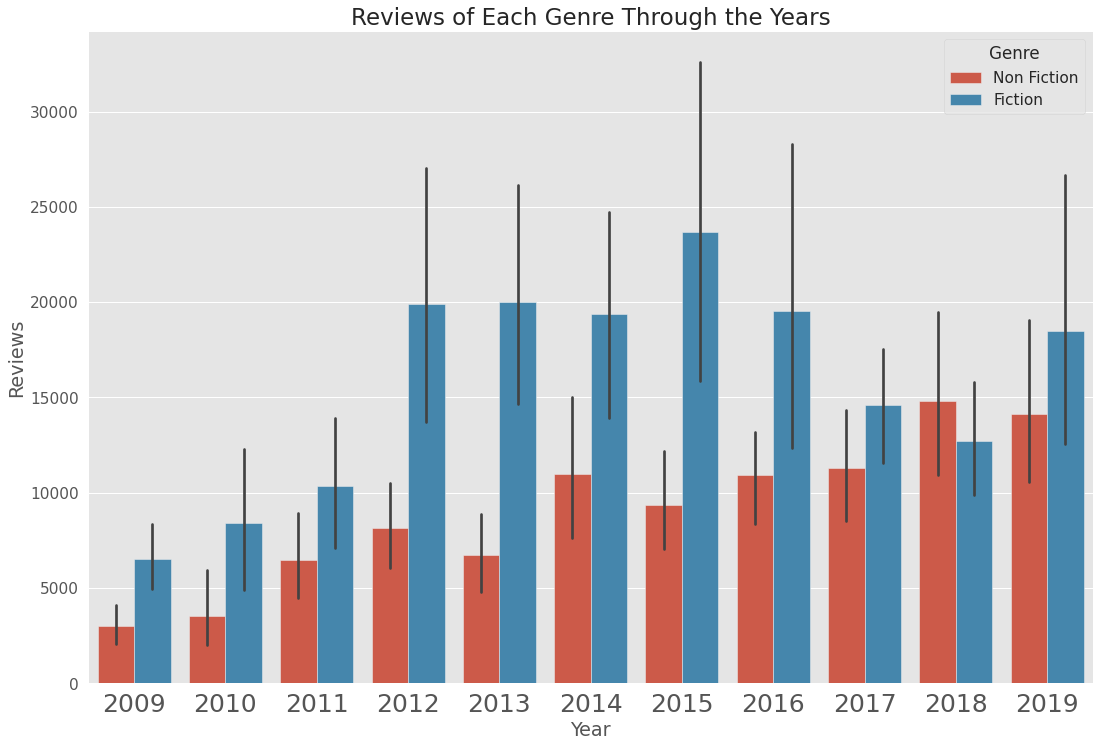

In [20]:
#plotting genres total review for all the years the year
sns.barplot(x='Year', y='Reviews', hue='Genre', data = books_df).set_title("Reviews of Each Genre Through the Years");

#### Plotting the books prices over the years:

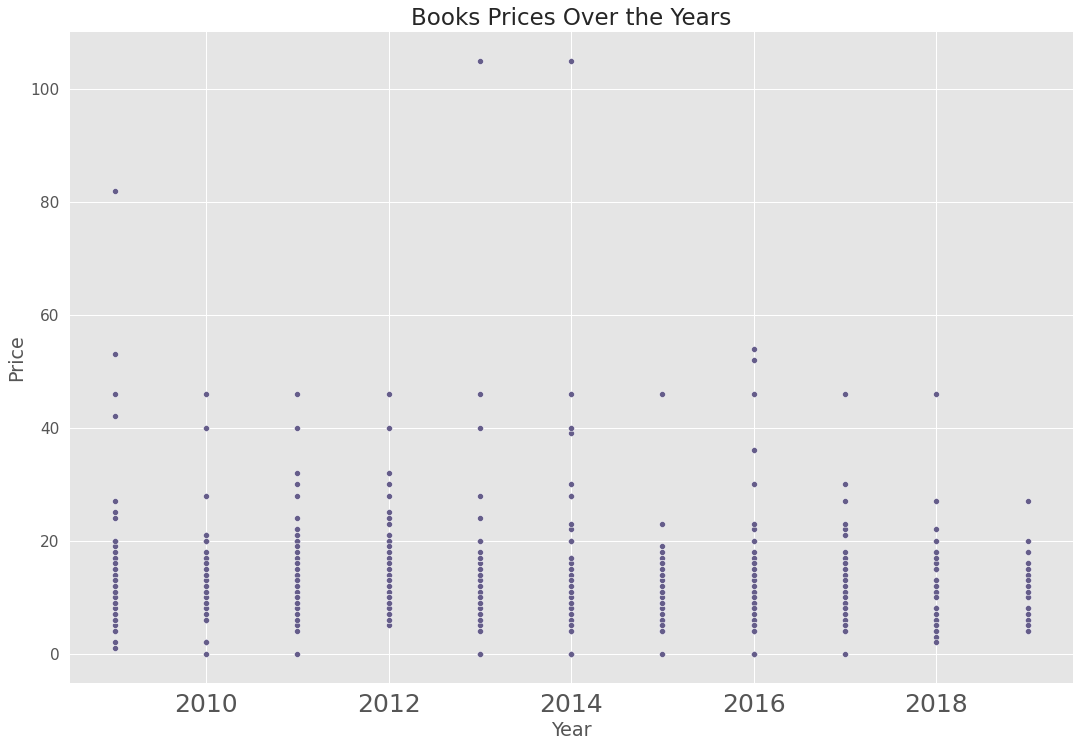

In [21]:
#scatter plot using seaborn
sns.scatterplot(x="Year", y="Price", data = books_df, color='#655D8A').set_title("Books Prices Over the Years");

### 6- Concolusion

The dataset was a clean and suitable data set for EDA, and there some observation that can be obtained from the data such as:
- The prices of the books slightly decrease through the years
- Most of best seller books are fiction, yet more people review the non-fiction books.
- Publication Manual of the American Psychological Association managed to remine in the bestselling books for 10 years!

Reaching the end of this notebook, I personally believe this dataset could have been handled better. However, I'm still encouraged and entertained by what I made and tried in this notebook. I'm looking forward to discovering more and perform more EDA in the near future.


### 7- Resources
- Dataset:
    https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019
- Code used for donut-like pie graph:
    https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f